In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import pandas as pd
import numpy as np

In [3]:
titanic_data = pd.read_csv('../Datasets/train.csv')

X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)

# split string variables to integer by dummy variables
X = pd.get_dummies(X)

# fill NA falues in Age variable by median
X = X.fillna({'Age': X.Age.median()})

# Pred. variable
y = titanic_data.Survived

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=314)

In [5]:
clf_rf = RandomForestClassifier()

In [6]:
parameters = {'n_estimators':[10,20,30], 'max_depth':[2,5,7,10]}

In [7]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)

In [8]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [9]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

### Problem 1
Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, поместите её в переменную rf. Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и поместите его в переменную predictions.

In [30]:
rf = RandomForestClassifier(n_estimators=15, max_depth=5)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [11]:
best_clf = grid_search_cv_clf.best_estimator_

In [12]:
best_clf.score(X_test, y_test)

0.8338983050847457

In [13]:
feature_importances = best_clf.feature_importances_

In [14]:
feature_importances_df = pd.DataFrame({'feature': list(X_train),
                                      'feature_importances': feature_importances})

In [16]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,feature,feature_importances
6,Sex_male,0.394395
5,Sex_female,0.167306
4,Fare,0.122280
0,Pclass,0.103021
1,Age,0.090828
3,Parch,0.048945
2,SibSp,0.037669
9,Embarked_S,0.015047
7,Embarked_C,0.012665
8,Embarked_Q,0.007845


### Problem 2
Воспользуемся данными о [сердечных заболеваниях](https://www.kaggle.com/ronitf/heart-disease-uci) и обучим на них **Random Forest**. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).

In [7]:
heart = pd.read_csv("../Datasets/heart.csv")
X = heart.drop('target', axis=1)
y = heart.target
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)

In [9]:
rf.fit(X,y)

RandomForestClassifier(max_depth=5, n_estimators=10)

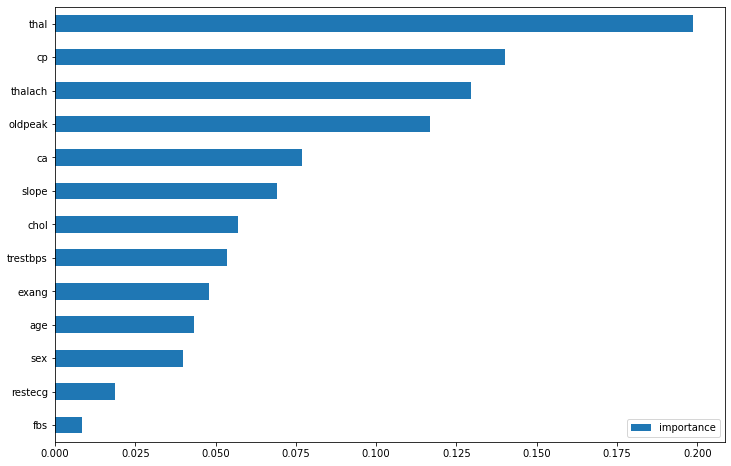

In [13]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))